In [1]:
# Creating the Dataset

#simulated probability distribution of one stock
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_peppers(sd, mean, alfa, size):
  #invertire il segno di alfa
  x = skewnorm.rvs(-alfa, size=size) 
  def calc(k, sd, mean):
    return (k*sd)+mean
  x = calc(x, sd, mean) #standard distribution

  #graph the distribution
  pd.DataFrame(x).hist(bins=100)

  #pick one random number from the distribution
  #formally I would use cdf, but I just have to pick randomly from the 1000000 samples
  df = [np.random.choice(x) for k in range(size)]
  #return the DataFrame
  return pd.DataFrame(df)

def cm_converter(px_measurements):
  pc_cm = 0.05725
  for _ in range(len(px_measurements)):
    px_measurements[_][1] *= pc_cm
    px_measurements[_][2] *= pc_cm
  return px_measurements


/Users/solution/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


,height,width,name,color
0,14.541922,3.725744,Anaheim,Green
1,15.261588,3.444669,Anaheim,Green
2,14.935782,4.037678,Anaheim,Green
3,13.459893,4.221832,Anaheim,Green
4,15.485250,3.182954,Anaheim,Green
...,...,...,...,...
99995,1.019877,0.601560,Cumari,Yellow
99996,0.994442,0.667475,Cumari,Yellow
99997,0.895260,0.649481,Cumari,Yellow
99998,0.917342,0.621353,Cumari,Yellow


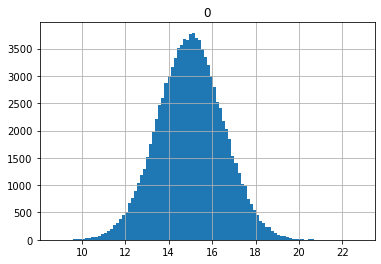

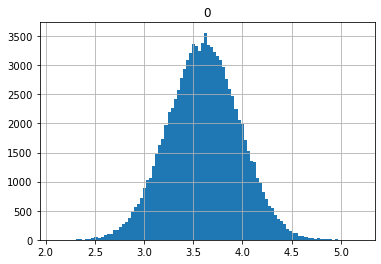

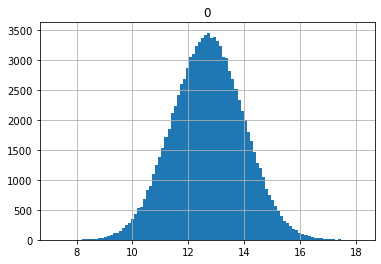

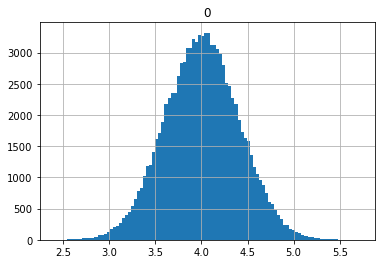

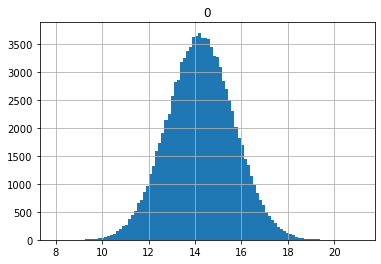

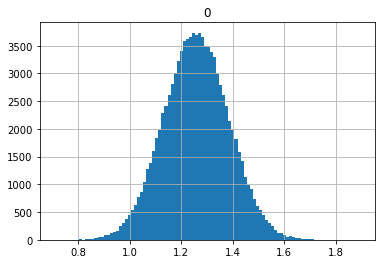

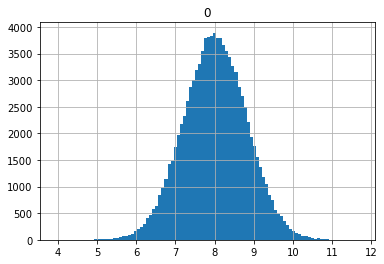

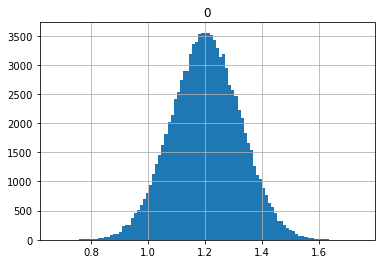

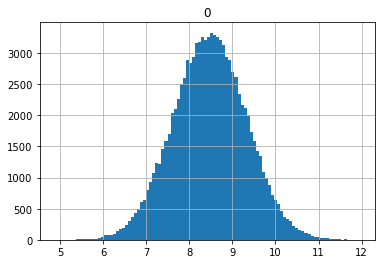

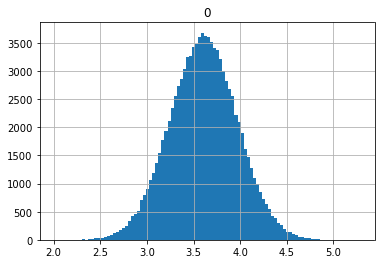

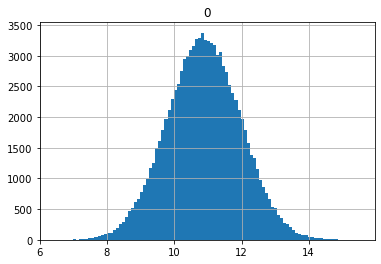

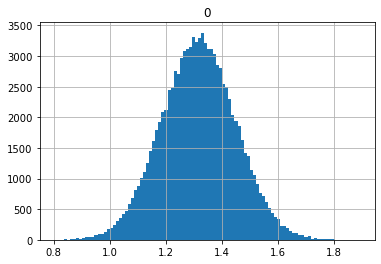

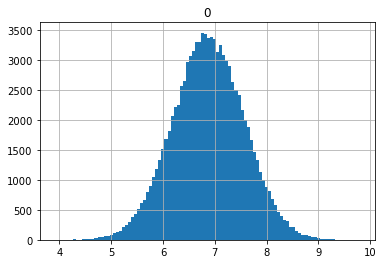

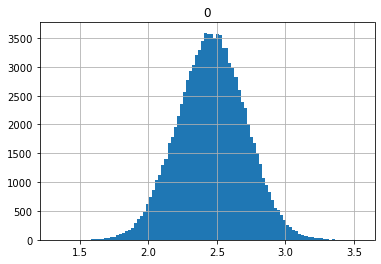

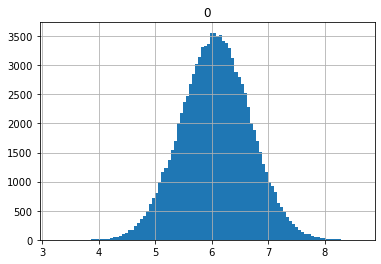

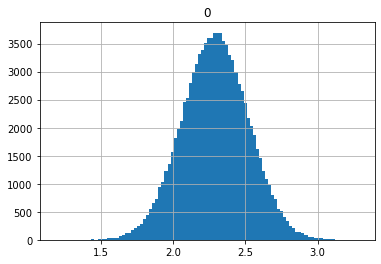

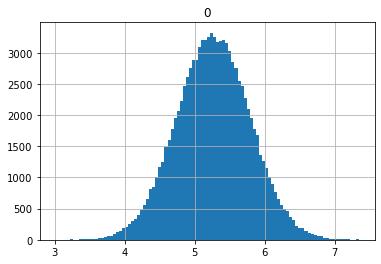

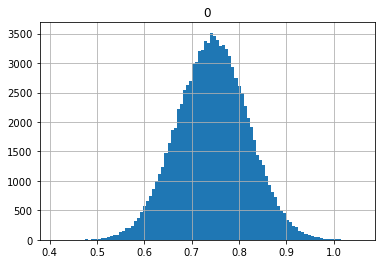

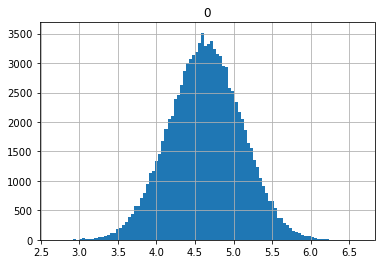

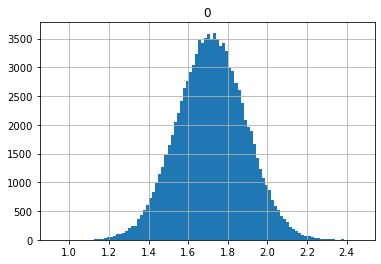

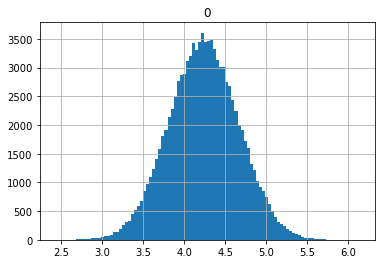

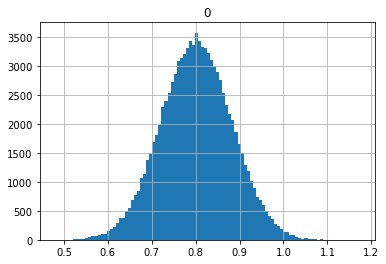

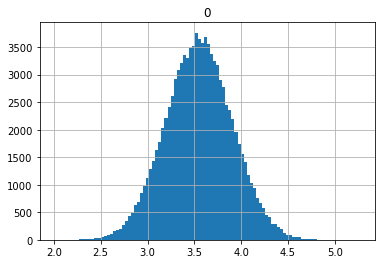

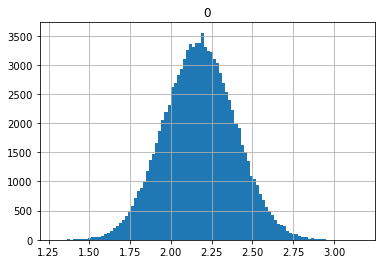

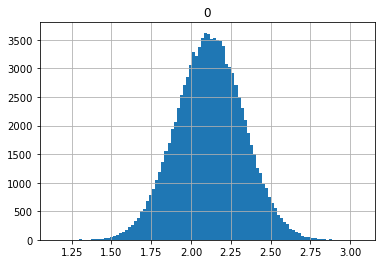

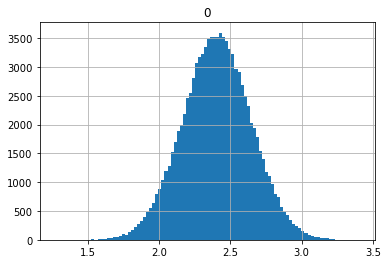

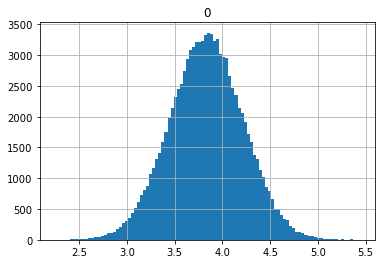

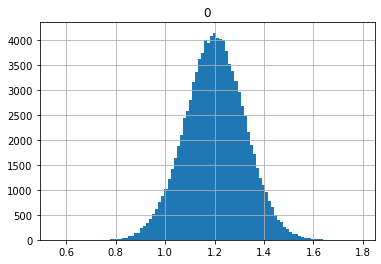

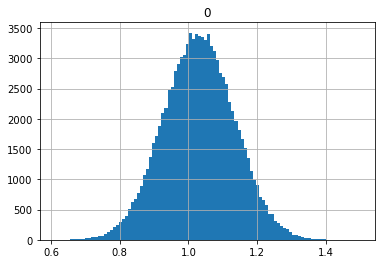

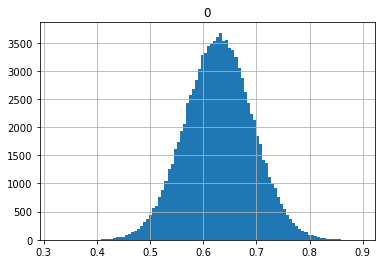

In [2]:
#   measurements
pepper_measurements_px = [
                          ['Anaheim', 262, 63, 'Green'],
                          ['Cubanelle', 222, 70, 'Green'],
                          ['Cayenne', 249, 22, 'Red'],
                          ['Shishito', 140, 21, 'Green'],
                          ['Hungarian Wax', 148, 63, 'Orange'],

                          ['Jimmy Nardello', 190, 23, 'Red'],
                          ['Fresno', 120, 43, 'Red'],
                          ['Jalapeno', 106, 40, 'Dark Green'],
                          ['Aji Amarillo', 92, 13, 'Yellow'],
                          ['Aji Dulce', 81, 30, 'Red'],

                          ['Serrano', 74, 14, 'Dark Green'],
                          ['Padron', 62, 38, 'Dark Green'],
                          ['Scotch Bonnet', 37, 42, 'Yellow'],
                          ['Habanero', 67, 21, 'Orange'],
                          ['Cumari', 18, 11, 'Yellow'],
]

#   create converted list
pepper_measurements_cm = cm_converter(pepper_measurements_px)

#   create final datasets
heigh_sd = 0.1
width_sd = 0.1

df = pd.DataFrame()
for _ in pepper_measurements_cm:
  #   create height
  #SD is 10% of the height
  df_height = create_peppers(_[1]*heigh_sd, _[1], 0, 100000)
  #   create width
  #SD is 10% of the width
  df_width = create_peppers(_[2]*width_sd, _[2], 0, 100000)
  #create DataFrame
  df_single = pd.concat([df_height, df_width], axis=1)
  df_single.columns = ['height', 'width']
  #create name
  df_single['name'] = str(_[0])
  df_single['color'] = str(_[3])

  df = pd.concat([df, df_single], axis=0)
df

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'width'}>]], dtype=object)

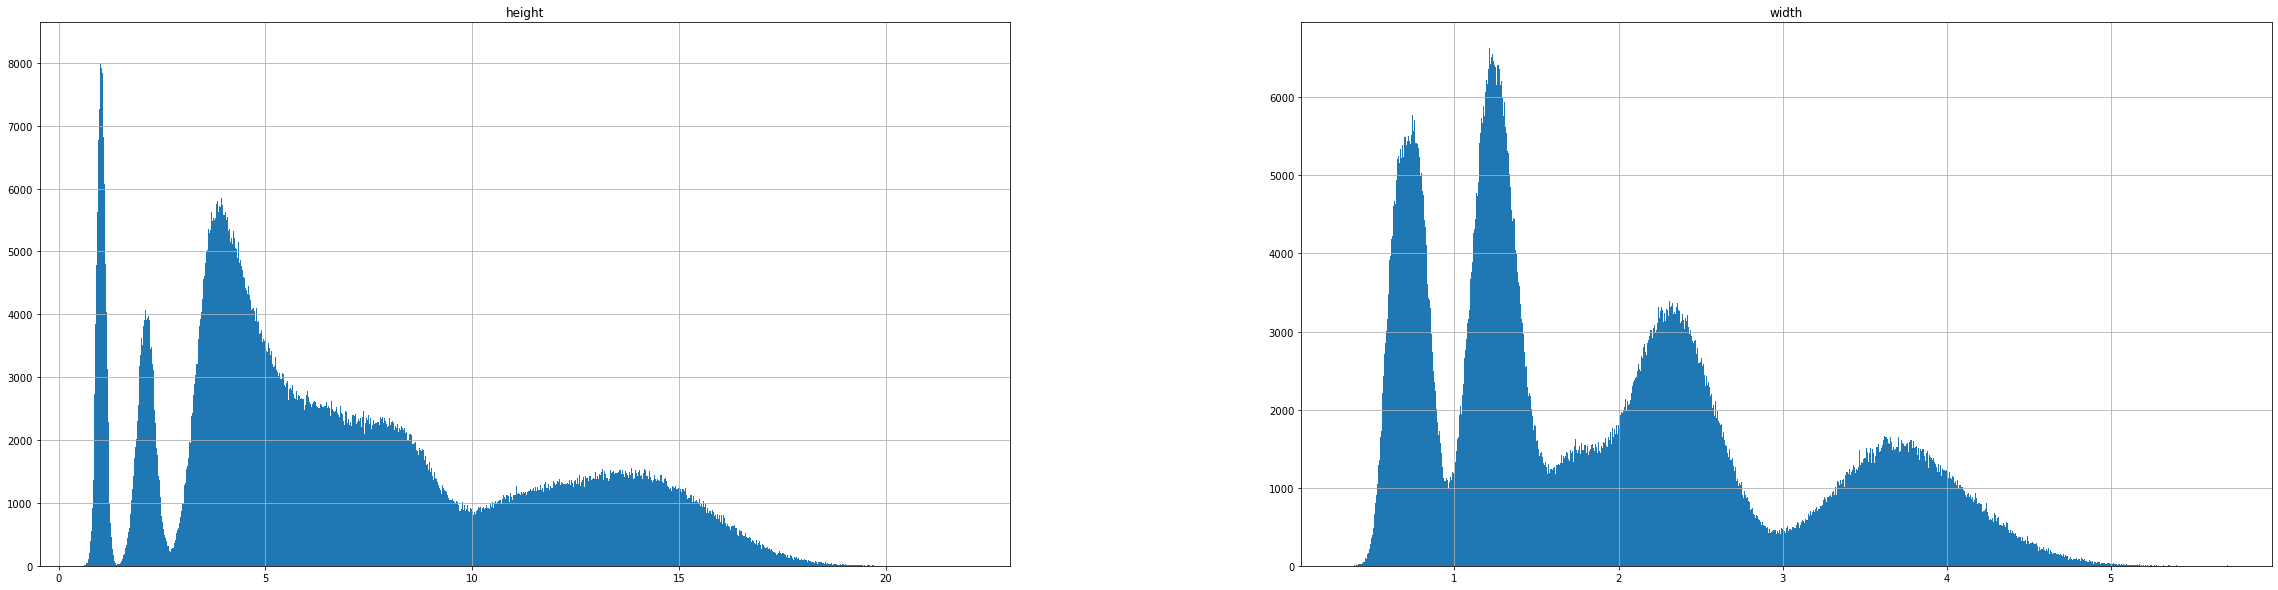

In [3]:
df.hist(bins=1000, figsize=(40, 10))

In [4]:
# Classifier
X = df.copy()

def one_hot(df, partitions):
  #togliamo le colonne da X
  for col in partitions:
    k = df.pop(col)
    k = pd.get_dummies(k, prefix=col)
    df = pd.concat([df, k] , axis=1)
  return df

X = one_hot(X, ['color'])
X


,height,width,name,color_Dark Green,color_Green,color_Orange,color_Red,color_Yellow
0,14.541922,3.725744,Anaheim,0,1,0,0,0
1,15.261588,3.444669,Anaheim,0,1,0,0,0
2,14.935782,4.037678,Anaheim,0,1,0,0,0
3,13.459893,4.221832,Anaheim,0,1,0,0,0
4,15.485250,3.182954,Anaheim,0,1,0,0,0
...,...,...,...,...,...,...,...,...
99995,1.019877,0.601560,Cumari,0,0,0,0,1
99996,0.994442,0.667475,Cumari,0,0,0,0,1
99997,0.895260,0.649481,Cumari,0,0,0,0,1
99998,0.917342,0.621353,Cumari,0,0,0,0,1


In [5]:
y = X.pop('name')
y

0        Anaheim
1        Anaheim
2        Anaheim
3        Anaheim
4        Anaheim
          ...   
99995     Cumari
99996     Cumari
99997     Cumari
99998     Cumari
99999     Cumari
Name: name, Length: 1500000, dtype: object

In [6]:
pd.DataFrame(y)

,name
0,Anaheim
1,Anaheim
2,Anaheim
3,Anaheim
4,Anaheim
...,...
99995,Cumari
99996,Cumari
99997,Cumari
99998,Cumari


In [7]:
X

,height,width,color_Dark Green,color_Green,color_Orange,color_Red,color_Yellow
0,14.541922,3.725744,0,1,0,0,0
1,15.261588,3.444669,0,1,0,0,0
2,14.935782,4.037678,0,1,0,0,0
3,13.459893,4.221832,0,1,0,0,0
4,15.485250,3.182954,0,1,0,0,0
...,...,...,...,...,...,...,...
99995,1.019877,0.601560,0,0,0,0,1
99996,0.994442,0.667475,0,0,0,0,1
99997,0.895260,0.649481,0,0,0,0,1
99998,0.917342,0.621353,0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [10]:
clf.score(X_test, y_test, sample_weight=None)

0.9657666666666667